<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/__%5BNLP_%EC%96%B8%EC%A0%9C%EA%B9%8C%EC%A7%80_%EB%AF%B8%EB%A3%B0%EB%9E%98__%EC%9D%BC%EB%8B%A8_%EB%93%A4%EC%96%B4%EC%99%80!!%5D_2_NLP_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 65.8 MB/s 


*총 5개의 노트북으로 시작하는 자연어 처리 입문 튜토리얼*


*이번 대회와 함께 그간 미루고 있었던 NLP, 지금 시작해보세요!!*

1. 자연어 처리란?


### 2. NLP Preprocessing <<<<




3. Vectorization


4. Embedding


5. Modeling



---

## NLP Preprocessing란?

* NLP 전처리는 정해진 정답이 없으며 데이터와 목적에 따라 달라집니다. 이 과정은 주로 모델의 입력인 단어,문장,문서의 vector를 만들기 전에 진행이 되며 이번 노트북에서는 대부분의 NLP에 널리 쓰이는 방법들을 간단한 코드 예제와 함께 다루어보도록 하겠습니다.

일반적인 NLP 전처리의 과정을 이번 신문기사 분류 대회에 적용해 보겠습니다.

1. 데이터를 불러온 후 각 신문기사들을 눈으로 확인하며 특수문자, 불용어 그리고 문장 구조에 대한 감을 잡습니다.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:15px; height:15px;"></img><br/>

2. 문제의 목적과 분석자의 재량에 따라 불용어를 설정하고 리스트에 저장합니다. 이번 대회에서는 특수 문자와 조사만 제거해도 어느 정도 높은 정확도를 얻을 수 있습니다.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:15px; height:15px;"></img><br/>

3. 불용어 이외의 특수 문자들을 제거합니다. 이번 대회를 위해 저는 정규표현식 패키지(re)를 사용하여 한글과 영어 소문자를 제외한 모든 글자들을 제거하였습니다.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:15px; height:15px;"></img><br/>

4. 형태소 분석을 통해 문장을 형태소 단위의 토큰으로 분리합니다. 이때 내가 설정한 불용어들을 결과로 반환해주는 형태소 분석기를 사용하셔야 합니다. 예를 들어 조사를 불용어로 설정하였는데 조사를 분리해주지 못하는 형태소 분석기는 후보에서 제외하시면 됩니다.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" style="float: left;  margin-left: 100px; width:15px; height:15px;"></img><br/>

5. 형태소 단위의 토큰들을 기반으로 리스트에 저장된 불용어를 제거합니다.

---

## 1. 형태소 분석(Stemming)

* 형태소 분석이란 단어나 문장의 언어적 속성을 파악하는 것을 의미합니다. 보통 품사의 태깅(PoS)을 통해 이루어지며 한국어 형태소 분석을 위해 Konlpy 패키지에 있는 다양한 함수를 이용하여 진행 할 수 있습니다.


* 형태소 분석을 하는 이유는 주로  <span style="color:red">형태소 단위로 의미있는 단어 </span>를 가져가고 싶거나 품사 태깅을 통해 <span style="color:red"> 형용사나 명사를 추출</span>하고 싶을 때 많이 이용하게 됩니다. 

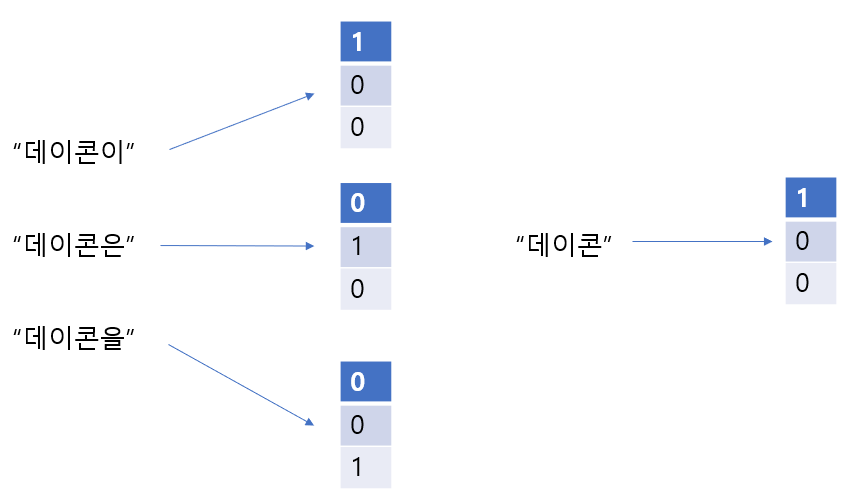</img><br/>

* 문장을 띄어쓰기 단위로 분류하여 vectorization을 하게 되면 "데이콘"이라는 같은 의미의 토큰 세개가 서로 다른 vector를 갖게 됩니다. 이렇게 되면 모델이 세 단어를 각각 다른 단어로 이해합니다. 하지만 형태소 분석을 통해 "데이콘"이라는 토큰을 추출한다면 앞의 세 단어는 동일한 vector를 갖게되며 모델이 해당 토큰을 더 잘 학습하는 데 도움이 됩니다.



* <span style="color:red"> 형태소 분석은 어쩌면 모델링보다 성능에 더 중요한 영향을 미치는 아주 중요한 과정입니다. </span> 시간이 허락한다면 다양한 형태소 분석기를 사용하여 결과를 비교하는 것을 추천드립니다.

### 1-1. Kkma()

In [3]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(kkma.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(kkma.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

형태소 단위로 문장 분리
----------------------
['데이', '콘', '에서', '다양', '하', 'ㄴ', '컴피티션', '을', '즐기', '면서', '실력', '있', '는', '데이터', '분석가', '로', '성장', '하', '세요', '!!', '.']
 
문장에서 명사 추출
----------------------
['데이', '데이콘', '콘', '다양', '컴피티션', '실력', '데이터', '분석가', '성장']
 
품사 태킹(PoS)
----------------------
[('데이', 'NNG'), ('콘', 'NNG'), ('에서', 'JKM'), ('다양', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('컴피티션', 'UN'), ('을', 'JKO'), ('즐기', 'VV'), ('면서', 'ECE'), ('실력', 'NNG'), ('있', 'VV'), ('는', 'ETD'), ('데이터', 'NNG'), ('분석가', 'NNG'), ('로', 'JKM'), ('성장', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('!!', 'SW'), ('.', 'SF')]


### 1-2. Okt()

In [4]:
from konlpy.tag import Okt
Okt = Okt()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Okt.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Okt.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Okt.pos(sentence))

형태소 단위로 문장 분리
----------------------
['데', '이콘', '에서', '다양한', '컴피티션', '을', '즐기면서', '실력', '있는', '데이터', '분석', '가로', '성장하세요', '!!.']
 
문장에서 명사 추출
----------------------
['데', '이콘', '컴피티션', '실력', '데이터', '분석', '가로']
 
품사 태킹(PoS)
----------------------
[('데', 'Noun'), ('이콘', 'Noun'), ('에서', 'Josa'), ('다양한', 'Adjective'), ('컴피티션', 'Noun'), ('을', 'Josa'), ('즐기면서', 'Verb'), ('실력', 'Noun'), ('있는', 'Adjective'), ('데이터', 'Noun'), ('분석', 'Noun'), ('가로', 'Noun'), ('성장하세요', 'Adjective'), ('!!.', 'Punctuation')]


### 1-3. Mecab ()

In [5]:
from konlpy.tag import Mecab 
Mecab  = Mecab ()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Mecab .morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Mecab .nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Mecab .pos(sentence))

Exception: ignored

이 외에도 Twitter, Komoran, Hannanum 등의 형태소 분석기(Pos Tagger)들이 존재합니다. 속도와 정확도 면에서 차이가 있으며 주로 Mecab 분석기를 이용합니다. 개인적인 경험에 기반한 결과를 공유하겠습니다.

* Mecab: 굉장히 속도가 빠르면서도 좋은 분석 결과를 보여준다.
* Komoran: 댓글과 같이 정제되지 않은 글에 대해서 먼저 사용해보면 좋다.(오탈자를 어느정도 고려해준다.)
* Kkma: 분석 시간이 오래걸리기 때문에 잘 이용하지 않게 된다.
* Okt: 품사 태깅 결과를 Noun, Verb등 알아보기 쉽게 반환해준다.
* khaiii: 카카오에서 가장 최근에 공개한 분석기, 성능이 좋다고 알려져 있으며 다양한 실험이 필요하다. 

---

## 2. 표제어 추출(Lemmatization)

* 언어학을 전공하지 않은 사람에게 Lemmatization과 stemming은 큰 차이가 없다고 생각합니다.모두 단어의 본 모습을 찾아주는 과정으로서 Konlpy에서 공개한 형태소 분석기들을 이용하면 어느 정도 어간 추출이 가능합니다. 형태소 분석(Pos Tagging)을 stemming이라고 표기한 이유도 이와 같습니다.



* 다음과 같은 예시를 이용해보겠습니다.

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '성장했었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [ ]:
sentence = '성장하였었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('였', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


*NLP를 처음 공부할 때 형태소, 어간, 어미 등 언어학에 대한 이해가 가장 어려웠습니다. 이번 튜토리얼에서는 이러한 부분은 상당수 제거하고 코드 위주로 구성하였습니다.

---

## 3. 불용어 제거(Stopwords removing)

* 불용어를 간단하게 정의내리면 `문장에서 큰 의미가 없다고 생각되는 단어, 글자들` 입니다. 불용어는 데이터와 문제에 따라 유동적입니다. 다음과 같은 예시를 생각해 보겠습니다.

> 예시: "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"

* 예시 문장에서 감성분석을 진행할 때는 "훌륭한"과 "아름다운"등이 주요 특징으로 사용될 것입니다. 하지만 경우에 따라서는 이러한 형용사들을 제외한 배우들의 연기력과 목소리라는 정보에 집중해야 할 때가 있습니다. 이럴때는 "훌륭한"과 "아름다운"은 불용어로 정의될 수 있습니다.

In [ ]:
import re
tokenizer = Okt()
def text_preprocessing(text,tokenizer):
    
    stopwords = ['을', '를', '이', '가', '은', '는']
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    token = tokenizer.morphs(txt)
    token = [t for t in token if t not in stopwords]
        
    return token

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre= text_preprocessing(ex_text,tokenizer)

위 코드의 설명입니다.

1.영어 소문자와 한글을 제외한 모든 문자를 제거  
2.Okt를 이용해 형태소 분석  
3.형태소 분석기를 거쳐 나온 결과들 중 stopwords 리스트에 포함되지 않는 토큰만 token이라는 리스트에 반환 

결과는 다음과 같습니다.

In [ ]:
print(example_pre)

['이번', '에', '새롭게', '개봉', '한', '영화', '의', '배우', '들', '모두', '훌륭한', '연기력', '과', '아름다운', '목소리', '갖고', '있어']


---

## 4. 대회 적용

아래 코드는 이번 대회에 바로 적용 가능한 전처리 코드입니다. 이 코드만 이해하고 사용하셔도 꽤나
높은 수준의 정확도를 얻을 수 있습니다.

In [ ]:
def text_preprocessing(text_list):
    
    stopwords = ['을', '를', '이', '가', '은', '는', 'null'] #불용어 설정
    tokenizer = Okt() #형태소 분석기 
    token_list = []
    
    for text in text_list:
        txt = re.sub('[^가-힣a-z]', ' ', text) #한글과 영어 소문자만 남기고 다른 글자 모두 제거
        token = tokenizer.morphs(txt) #형태소 분석
        token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        token_list.append(token)
        
    return token_list, tokenizer

#형태소 분석기를 따로 저장한 이유는 후에 test 데이터 전처리를 진행할 때 이용해야 되기 때문입니다. 
train['new_article'], okt = text_preprocessing(train['content']) 

이제 분리한 토큰을 기반으로 모델의 입력인 vectorization을 진행할 차례군요!!  

## To be continued......